In [125]:
import numpy as np
import matplotlib.pyplot as plt
import bisect
from collections import Counter

In [126]:
#parameters

n = 20 #number of trials
p_vector = [0.05, 0.15, 0.15, 0.65] #respective probabilities of success
x_vector = ["x1","x2","x3", "x4"] #names of outcomes

In [127]:
#Single time calculations of all x values in CDF

dimension = len(p_vector)
cdf_values = np.zeros(dimension)
total = 0

for i in range(0,dimension):
    total += p_vector[i]
    cdf_values[i] = total

In [128]:
#using one U(0,1) number, sample from a multinomial(n,p)

unif_num = np.random.uniform(0,1) #single uniform U(0,1) realization

successes = bisect.bisect_left(cdf_values, unif_num) #use binary search to find the number of successes

print(f"x{successes+1} was realized")

x4 was realized


In [129]:
#repeat this sampling process many times to approximate the PMF

repititions = 10000 #amount of binomials to realize to approximate PMF

arr_unif_num = np.random.uniform(0,1,repititions) #uniform U(0,1) realization stored in an array
arr_successes = np.zeros(repititions)

for i in range(0, repititions):
    arr_successes[i] = bisect.bisect_left(cdf_values, arr_unif_num[i]) #fill array wuth number of successes

result_dict = Counter(arr_successes) #use a dictionary to match key value pairs

for j in result_dict:
    result_dict[j] = result_dict[j] / repititions #reformat as percentage

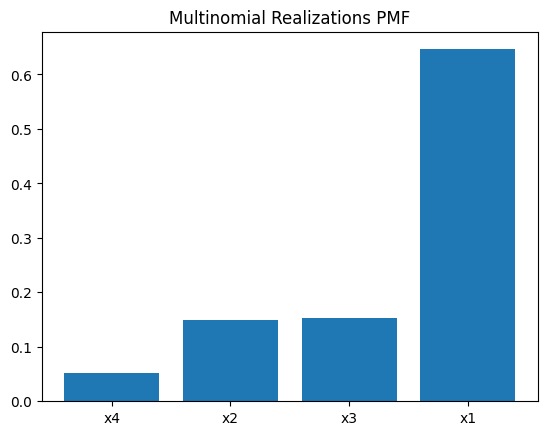

In [130]:
#chart the PMF approximation

x_axis_titles = list(result_dict.keys()) #element realized
heights = list(result_dict.values()) #percentage of realizations occuring at each element

plt.title("Multinomial Realizations PMF")
plt.bar(x_axis_titles, heights)
plt.xticks(x_axis_titles, x_vector)

plt.show()